# Importing different data science libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import pickle
import math
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Removing The dimentionless diamonds

In [ ]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

# Before Removing the outliers


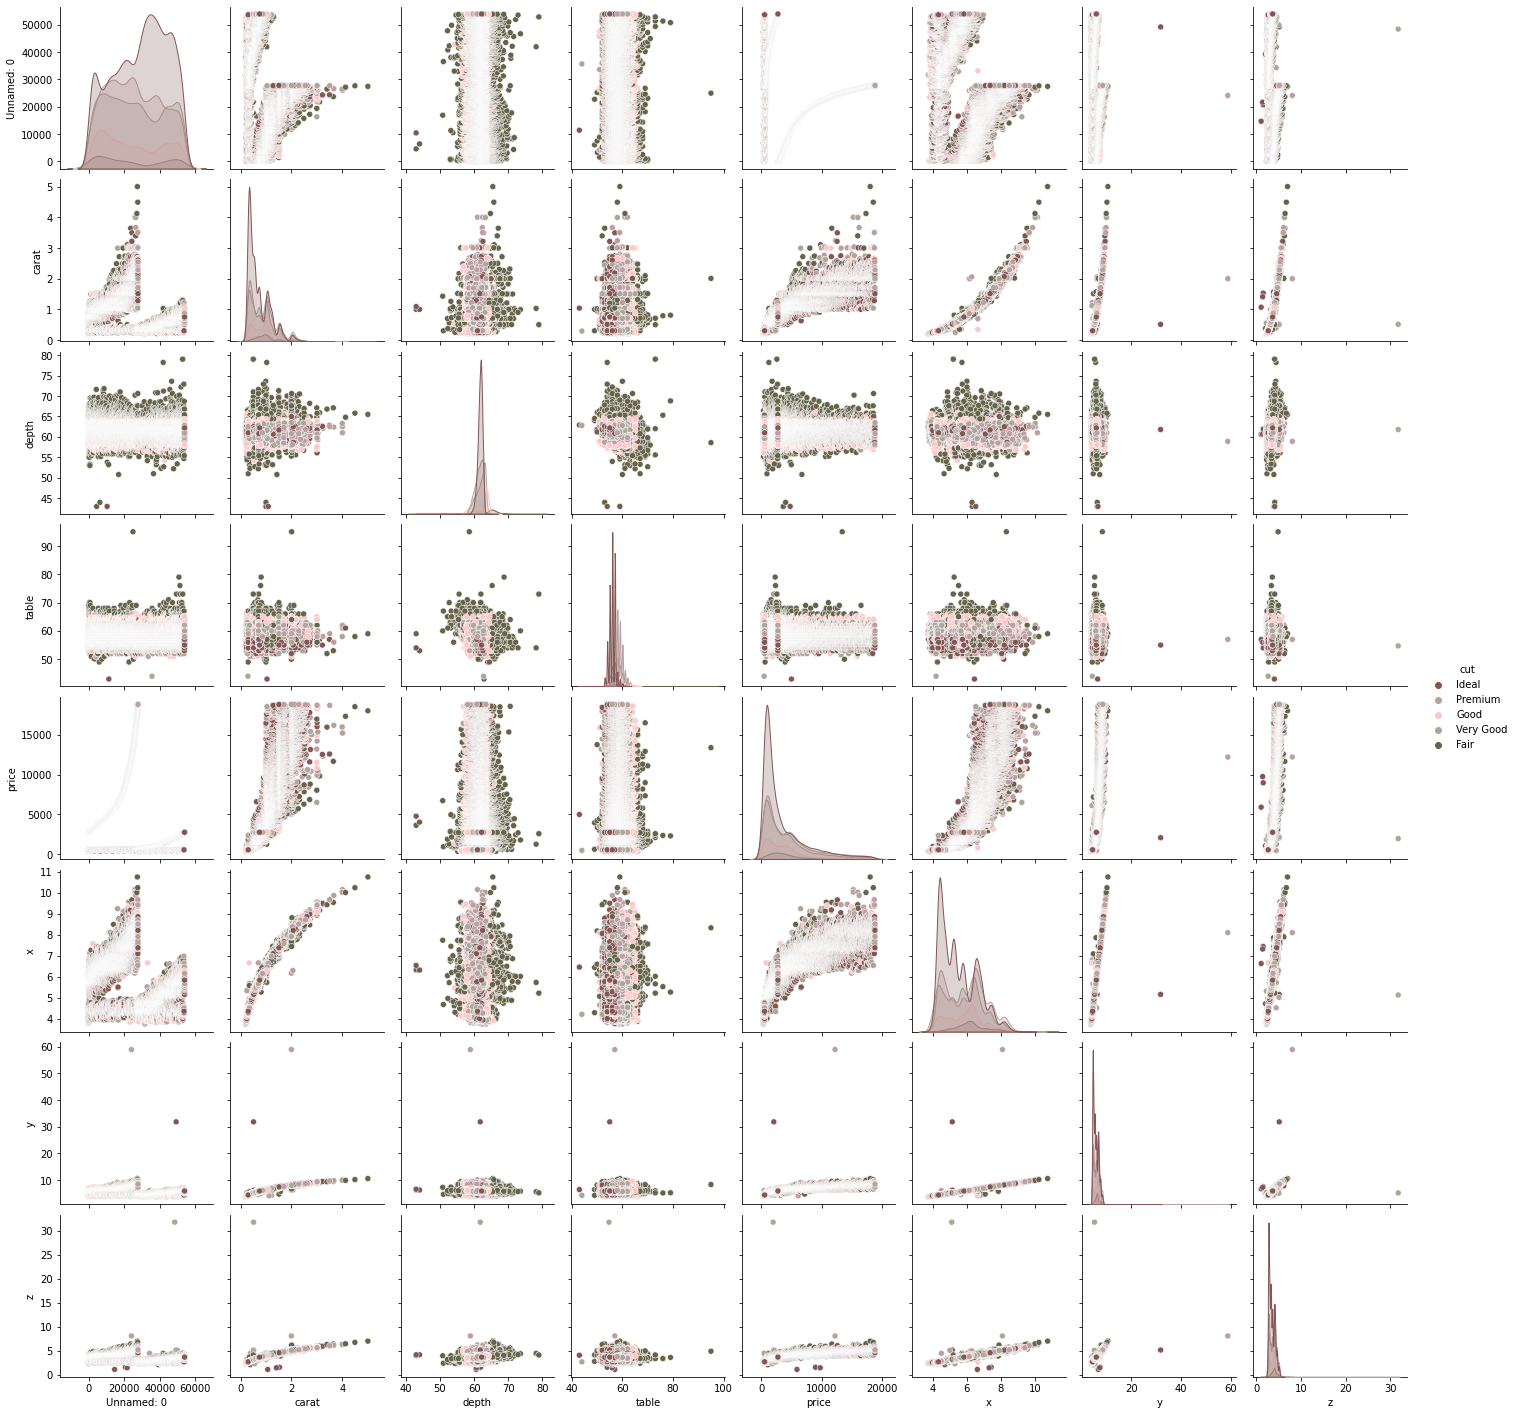

In [ ]:
shade = ["#835656", "#baa0a0", "#ffc7c8", 
         "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(data, 
                  hue= "cut",palette=shade)

# Dropping the outliers. 

In [ ]:
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]

# After Removing The Outliers

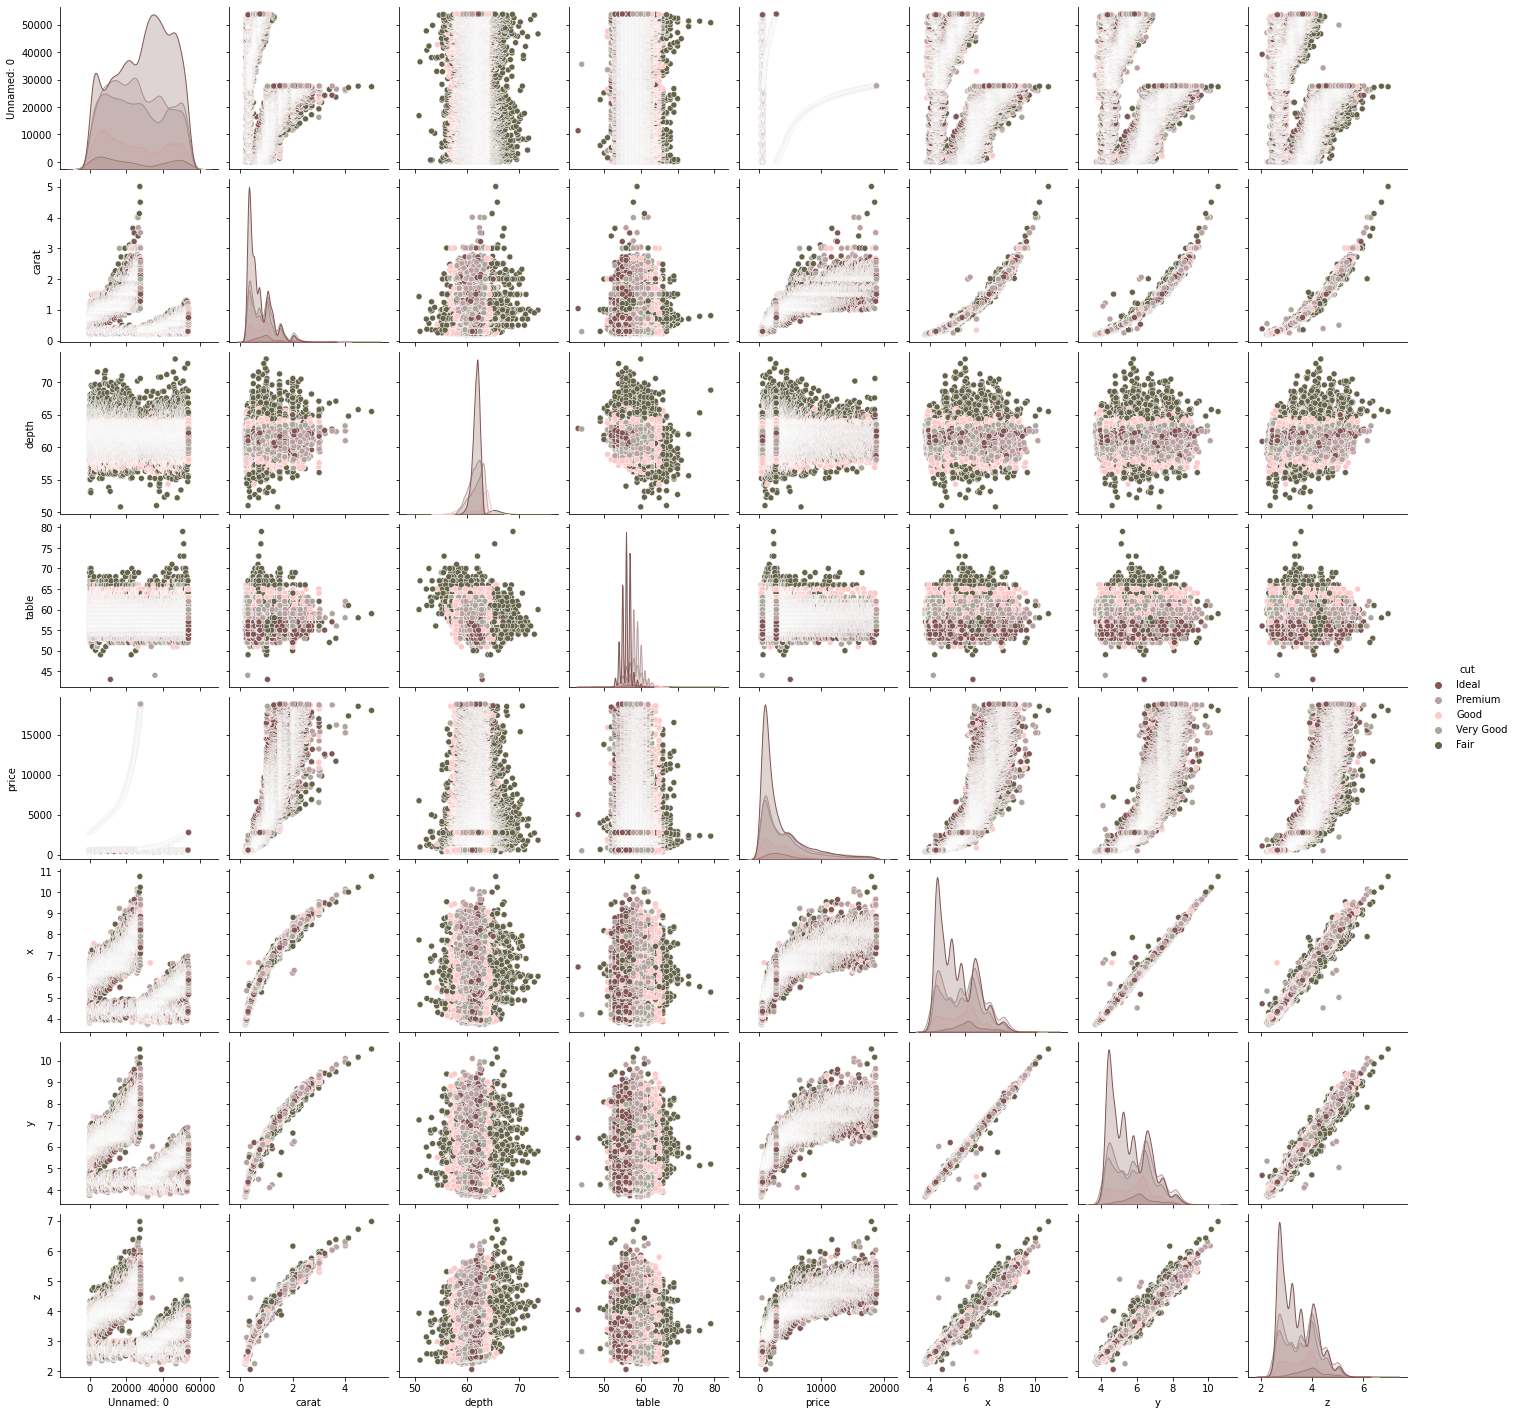

In [ ]:
shade = ["#835656", "#baa0a0", "#ffc7c8", 
         "#a9a799", "#65634a"]#shades for hue
ax = sns.pairplot(data, 
                  hue= "cut",palette=shade)

# Categorical Data

In [ ]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


# Encoding Label Data

In [ ]:
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])

# Plotting Heat map for visualization of Data

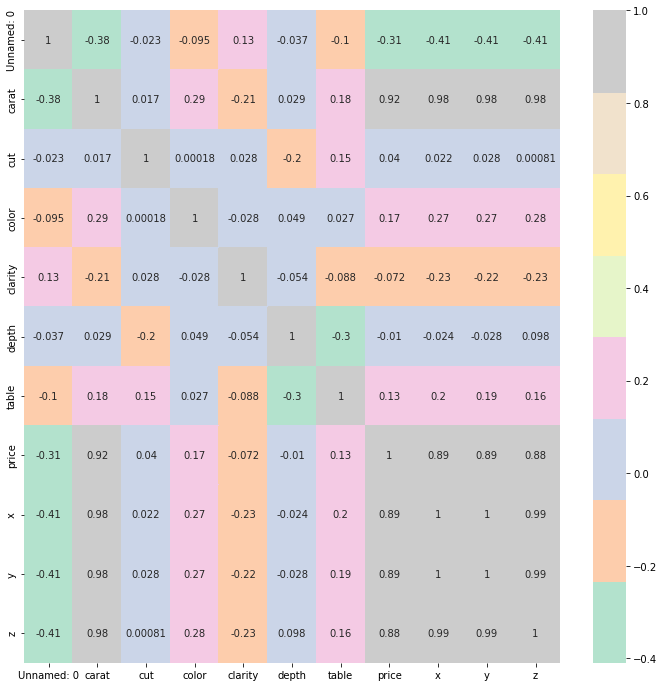

In [ ]:
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap="Pastel2",annot=True)

# Seperating Dependent and independent variable

In [ ]:
X= label_data.drop(["price"],axis =1) #indipendent Variable
y= label_data["price"] #dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

# Building pipelins of standard scaler and model for varios regressors.

In [ ]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines

In [ ]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference

In [ ]:
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines

In [ ]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)

[08:50:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Training The data on the train data for different ml models

In [ ]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1344.798387 
DecisionTree: -51.745803 
RandomForest: -36.272998 
KNeighbors: -666.216132 
[08:53:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:54:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:54:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:54:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:54:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0

# Saving The XGboost Model

In [ ]:
file_name = "xgb_reg.pkl"
pickle.dump(pipeline_xgb, open(file_name, "wb"))

# Loading the Model

In [ ]:
xgb_model_loaded = pickle.load(open(file_name, "rb"))

[08:54:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Testing the Xgboost Model on Unseen Data

In [ ]:
preds = xgb_model_loaded.predict(X_test)

# Printing the score of the model on the unseen data for XGboost

In [ ]:
print("R^2:",metrics.r2_score(y_test, preds))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, preds))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, preds))
print("MSE:",metrics.mean_squared_error(y_test, preds))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preds)))

R^2: 0.9973517661490602
Adjusted R^2: 0.997349799541418
MAE: 126.68033614855293
MSE: 41545.027262746946
RMSE: 203.8259729836876


# Printing the test data and the predicted data side by side for comparision

In [ ]:
print("y_test"+"\t"+"predicted")
preds=np.array(preds)
y_test=np.array(y_test)
for i in range(100):
  print(y_test[i],"\t",preds[i])

y_test	predicted
6426 	 6639.794
2771 	 2809.7625
3903 	 3996.2593
3678 	 3745.6956
660 	 710.1307
2080 	 3069.9944
4693 	 4383.5845
2473 	 2433.8035
6890 	 7043.353
2301 	 2287.0452
2959 	 2942.3015
5666 	 5211.992
402 	 571.28894
4223 	 4282.883
1651 	 1739.1798
4518 	 4714.528
6560 	 6780.7656
980 	 944.83844
865 	 927.45197
3002 	 3332.5107
891 	 915.2389
765 	 658.4413
4717 	 4764.321
5016 	 5182.254
16512 	 16402.979
2104 	 2081.4915
1922 	 2266.4937
2432 	 2325.2913
5216 	 5253.507
5694 	 5479.916
969 	 834.143
802 	 720.1946
4060 	 4375.0815
876 	 813.948
561 	 583.54474
775 	 722.39044
1114 	 866.3575
7978 	 8191.073
2970 	 3100.4185
4633 	 4689.6157
7388 	 7292.3716
1600 	 1718.017
10995 	 11099.859
902 	 949.4238
756 	 640.7801
863 	 1017.3287
710 	 742.52936
10236 	 10383.13
671 	 762.80646
955 	 961.1917
2170 	 2256.2861
1896 	 1982.5344
814 	 861.25116
1295 	 1340.1394
717 	 822.9713
7079 	 7358.9517
1974 	 1949.7286
3293 	 3126.357
2680 	 3481.821
552 	 794.7865
6870 	 6

# Checking How Many times the dimond price was Over estimated ,under estimated and how many times it was exact on point

In [ ]:
cou = 0
cou1= 0 
cou2= 0
for i in range(len(y_test)):
  if(int(y_test[i])<int(preds[i])):
    cou+=1
  if(int(y_test[i])>int(preds[i])):
    cou1+=1
  if(int(y_test[i])==int(preds[i])):
    cou2+=1
print("Over Estimated","\t","Under estimated","\t","Exact Estimation")
print(cou,"\t\t",cou1,"\t\t\t",cou2)
print("Total test values","\tSum of estimated values")
print(len(y_test),"\t\t\t\t",(cou+cou1+cou2))

Over Estimated 	 Under estimated 	 Exact Estimation
7366 		 6072 			 39
Total test values 	Sum of estimated values
13477 				 13477


# Saving The Decision Tree Model in a pickle file

In [ ]:
file_name = "dt_reg.pkl"
pickle.dump(pipeline_dt, open(file_name, "wb"))

# Loading the Decision Tree Model

In [ ]:
dt_model_loaded = pickle.load(open(file_name, "rb"))

# Predicting Using The Decision Tree Model

In [ ]:
preds_dt = dt_model_loaded.predict(X_test)

# Accuracy Testing of Decision Tree Model

In [ ]:
print("R^2:",metrics.r2_score(y_test, preds_dt))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, preds_dt))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, preds_dt))
print("MSE:",metrics.mean_squared_error(y_test, preds_dt))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preds_dt)))

R^2: 0.999923806169282
Adjusted R^2: 0.9999237495869037
MAE: 2.854938042591081
MSE: 1195.3154262818134
RMSE: 34.57333403479932


# Printing the first 100 test value and predicted values side by side for comparision for decision tree

In [ ]:
print("y_test"+"\t"+"predicted")
preds_dt=np.array(preds_dt)
y_test=np.array(y_test)
for i in range(100):
  print(y_test[i],"\t",preds_dt[i])

y_test	predicted
6426 	 6425.0
2771 	 2771.0
3903 	 3900.0
3678 	 3678.0
660 	 660.0
2080 	 2134.0
4693 	 4693.0
2473 	 2473.0
6890 	 6889.0
2301 	 2302.0
2959 	 2959.0
5666 	 5666.0
402 	 402.0
4223 	 4223.0
1651 	 1651.0
4518 	 4518.0
6560 	 6561.0
980 	 981.0
865 	 865.0
3002 	 3002.0
891 	 891.0
765 	 765.0
4717 	 4718.0
5016 	 5015.0
16512 	 16512.0
2104 	 2104.0
1922 	 1920.0
2432 	 2433.0
5216 	 5215.0
5694 	 5692.0
969 	 969.0
802 	 802.0
4060 	 4060.0
876 	 876.0
561 	 561.0
775 	 775.0
1114 	 1114.0
7978 	 7978.0
2970 	 2970.0
4633 	 4633.0
7388 	 7389.0
1600 	 1600.0
10995 	 10993.0
902 	 902.0
756 	 756.0
863 	 863.0
710 	 710.0
10236 	 10241.0
671 	 671.0
955 	 955.0
2170 	 2170.0
1896 	 1897.0
814 	 814.0
1295 	 1295.0
717 	 717.0
7079 	 7080.0
1974 	 1974.0
3293 	 3290.0
2680 	 2679.0
552 	 552.0
6870 	 6872.0
8789 	 8789.0
630 	 629.0
7688 	 7687.0
2918 	 2918.0
1333 	 1333.0
1449 	 1449.0
2818 	 2818.0
1035 	 1028.0
5510 	 5510.0
5632 	 5631.0
10607 	 10602.0
1061 	 10

# Checking For how many values were Over estimated ,under estimated and how many were on point for Decision Tree

In [ ]:
cou = 0
cou1= 0 
cou2= 0
for i in range(len(y_test)):
  if(int(y_test[i])<int(preds_dt[i])):
    cou+=1
  if(int(y_test[i])>int(preds_dt[i])):
    cou1+=1
  if(int(y_test[i])==int(preds_dt[i])):
    cou2+=1
print("Over Estimated","\t","Under estimated","\t","Exact Estimation")
print(cou,"\t\t",cou1,"\t\t\t",cou2)
print("Total test values","\tSum of estimated values")
print(len(y_test),"\t\t\t\t",(cou+cou1+cou2))

Over Estimated 	 Under estimated 	 Exact Estimation
2001 		 2582 			 8894
Total test values 	Sum of estimated values
13477 				 13477


# Saving the Random forest Model in a pickle file

In [ ]:
file_name = "rf_reg.pkl"
pickle.dump(pipeline_rf, open(file_name, "wb"))

# Loading the saved random forest model

In [ ]:
rf_model_loaded = pickle.load(open(file_name, "rb"))

# Predicting the price of diamond from the test values using Random Forest

In [ ]:
preds_rf = rf_model_loaded.predict(X_test)

# Using Metrics to print the accuracy of the Random Forest Model

In [ ]:
print("R^2:",metrics.r2_score(y_test, preds_rf))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, preds_rf))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, preds_rf))
print("MSE:",metrics.mean_squared_error(y_test, preds_rf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preds_rf)))

R^2: 0.9999598556958095
Adjusted R^2: 0.9999598258842067
MAE: 3.1051361578986474
MSE: 629.7767893299696
RMSE: 25.095353939125257


# Printing the first 100 test value and predicted values side by side for comparision for Random Forest 

In [ ]:
print("y_test"+"\t"+"predicted")
preds_rf=np.array(preds_rf)
y_test=np.array(y_test)
for i in range(100):
  print(y_test[i],"\t",preds_rf[i])

y_test	predicted
6426 	 6426.16
2771 	 2770.77
3903 	 3902.33
3678 	 3677.19
660 	 660.02
2080 	 2078.12
4693 	 4692.69
2473 	 2473.12
6890 	 6889.09
2301 	 2301.77
2959 	 2958.97
5666 	 5662.26
402 	 407.94
4223 	 4222.19
1651 	 1650.95
4518 	 4518.29
6560 	 6560.64
980 	 980.88
865 	 864.81
3002 	 3001.96
891 	 891.01
765 	 765.0
4717 	 4717.88
5016 	 5015.26
16512 	 16510.29
2104 	 2103.81
1922 	 1922.14
2432 	 2432.16
5216 	 5215.48
5694 	 5692.02
969 	 969.0
802 	 802.0
4060 	 4059.46
876 	 876.0
561 	 561.0
775 	 774.74
1114 	 1114.0
7978 	 7976.75
2970 	 2969.79
4633 	 4632.98
7388 	 7387.78
1600 	 1599.69
10995 	 10994.65
902 	 902.27
756 	 756.0
863 	 863.0
710 	 710.04
10236 	 10239.19
671 	 671.1
955 	 954.98
2170 	 2170.1
1896 	 1896.09
814 	 814.0
1295 	 1295.0
717 	 716.93
7079 	 7079.15
1974 	 1974.0
3293 	 3291.71
2680 	 2679.32
552 	 551.86
6870 	 6871.16
8789 	 8788.73
630 	 629.14
7688 	 7687.03
2918 	 2917.62
1333 	 1328.91
1449 	 1449.02
2818 	 2818.04
1035 	 1029.

# Checking For how many values were Over estimated ,under estimated and how many were on point for Random Forest

In [ ]:
cou = 0
cou1= 0 
cou2= 0
for i in range(len(y_test)):
  if(int(y_test[i])<int(preds_rf[i])):
    cou+=1
  if(int(y_test[i])>int(preds_rf[i])):
    cou1+=1
  if(int(y_test[i])==int(preds_rf[i])):
    cou2+=1
print("Over Estimated","\t","Under estimated","\t","Exact Estimation")
print(cou,"\t\t",cou1,"\t\t\t",cou2)
print("Total test values","\tSum of estimated values")
print(len(y_test),"\t\t\t\t",(cou+cou1+cou2))

Over Estimated 	 Under estimated 	 Exact Estimation
1180 		 6236 			 6061
Total test values 	Sum of estimated values
13477 				 13477


# As We can See in the Decision tree gives us better estimation of Price of Diamonds So we will be using Decision Tree as Our Model